# convert pleco dump to spreadsheet

In [119]:
#import xml file
import xml.etree.ElementTree as ET
import csv
tree = ET.parse('./Report.xml')
root = tree.getroot()
card_data = []
for card in root.findall(".//card"):
    card_datum = {}
    card_datum["created_stamp"] = card.get("created")
    card_datum["modified_stamp"] = card.get("modified")
    
    entry = card.find("./entry")
    card_datum["traditional"] = entry.find("./headword[@charset='tc']").text

    if entry.find("./cantopron") is None:
        continue
    card_datum["jyutping"] = entry.find("./cantopron").text
    
    if card.find("scoreinfo") is None:
        continue
    card_datum["correct"] = int(card.find("scoreinfo").get("correct"))
    card_datum["incorrect"] = int(card.find("scoreinfo").get("incorrect"))
    card_datum["difficulty"] = int(card.find("scoreinfo").get("difficulty"))
    card_datum["priority"] = card.find("scoreinfo").get("priority")
    card_datum["last_reviewed_stamp"] = int(card.find("scoreinfo").get("lastreviewedtime"))
    card_data.append(card_datum)
    
    

    
    
#convert xml to csv
import pandas as pd
cards_frame = pd.DataFrame(card_data)
for stamp in ["last_reviewed_stamp","created_stamp","modified_stamp"]:
    cards_frame[stamp] = pd.to_datetime(cards_frame[stamp],unit='s').dt.round('1d')
    
cards_frame.sort_values("created_stamp", ascending=False,inplace=True)
cards_frame.to_csv('./Report.csv', index = False)


# View 30 Most Recently Added Vocabs

In [120]:
#30 most recently added
cards_frame.sort_values("created_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
816,2021-07-14,2021-08-02,悲,bei1,0,1,90,None,2021-08-02
814,2021-07-14,2021-08-02,氹返,tam5 faan2,0,1,90,None,2021-08-02
815,2021-07-14,2021-08-02,悲劇,bei1 kek6,0,1,90,None,2021-08-02
813,2021-06-30,2021-08-02,蠢,ceon2,3,2,90,veryhigh,2021-07-30
811,2021-06-30,2021-08-02,打過嚟,daa2 gwo3 lai4,0,1,90,None,2021-08-02
812,2021-06-30,2021-08-02,經過,ging1 gwo3,0,1,90,None,2021-08-02
810,2021-06-11,2021-08-02,大話,daai6 waa6,0,1,90,None,2021-08-02
803,2021-06-09,2021-08-02,落去,lok6 heoi3,0,1,90,None,2021-08-02
808,2021-06-09,2021-08-02,壞人,waai6 jan4,0,3,90,None,2021-08-02
807,2021-06-09,2021-08-02,冰球,bing1 kau4,0,3,90,None,2021-08-02


# View 30 Most Recently Reviewed Vocabs

In [121]:
#30 most recently reviewed
cards_frame.sort_values("last_reviewed_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
492,2020-10-08,2021-08-02,袜,mat6,0,1,90,None,2021-08-03
517,2020-10-28,2021-08-03,科幻片,fo1 waan6 pin2,0,1,90,None,2021-08-03
495,2020-10-28,2021-08-02,丈夫,zoeng6 fu1,0,1,90,None,2021-08-03
496,2020-10-28,2021-08-02,太太,taai3 taai2,0,1,90,None,2021-08-03
518,2020-10-28,2021-08-02,奇幻片,kei4 waan6 pin2,0,1,90,None,2021-08-03
509,2020-10-28,2021-08-02,坑渠,haang1 keoi4,0,1,90,None,2021-08-03
505,2020-10-28,2021-08-02,賬單,zoeng3 daan1,0,1,90,None,2021-08-03
816,2021-07-14,2021-08-02,悲,bei1,0,1,90,None,2021-08-02
504,2020-10-28,2021-08-02,幫,bong1,1,0,100,high,2021-08-02
515,2020-10-28,2021-08-02,號碼,hou6 maa5,0,1,90,None,2021-08-02


# View 30 Random Vocabs

In [122]:
#30 random words
cards_frame.sample(frac=1).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
466,2020-08-28,2021-07-24,眼鏡,ngaan5 geng2,3,4,68,None,2021-03-17
572,2020-12-24,2021-07-24,等一等,dang2 jat1 dang2,5,7,72,high,2021-07-25
124,2020-04-05,2021-07-24,靚女,leng3 neoi2,13,11,72,None,2021-03-17
549,2020-11-26,2021-07-24,唔得,m4 dak1,1,1,90,veryhigh,2021-07-27
177,2020-04-16,2021-07-24,青豆,ceng1 dau5,11,16,58,None,2021-03-17
470,2020-08-28,2021-07-24,追,zeoi1,4,1,90,None,2021-05-28
611,2021-01-21,2021-08-02,揀,gaan2,3,2,90,high,2021-07-21
352,2020-06-09,2021-07-24,冬天,dung1 tin1,5,3,98,None,2020-10-16
170,2020-04-16,2021-07-24,紅蘿蔔,hung4 lo4 baak6,4,22,70,None,2021-03-17
691,2021-03-10,2021-07-24,濃密,nung4 mat6,0,0,100,None,2021-03-10


# Cell Reserved for Searching

In [123]:
cards_frame[cards_frame.jyutping.str.contains('pin')]

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
518,2020-10-28,2021-08-02,奇幻片,kei4 waan6 pin2,0,1,90,None,2021-08-03
517,2020-10-28,2021-08-03,科幻片,fo1 waan6 pin2,0,1,90,None,2021-08-03
468,2020-08-28,2021-07-24,草坪,cou2 ping4,2,5,80,None,2021-04-14
296,2020-05-23,2021-07-24,平板電腦,ping4 baan2 din6 nou5,6,15,64,None,2021-04-14
59,2020-03-25,2021-07-24,蘋果,ping4 gwo2,12,17,50,None,2021-03-24


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
DatetimeIndex(['2021-07-28', '2021-07-29', '2021-07-30', '2021-07-31',
               '2021-08-01', '2021-08-02', '2021-08-03'],
              dtype='datetime64[ns]', freq='D')


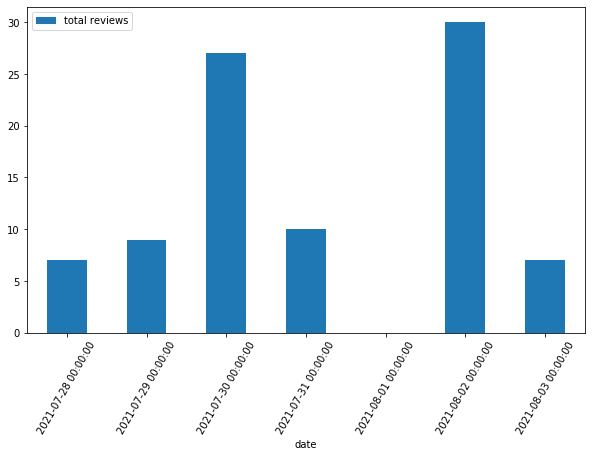

In [156]:
import datetime



today = pd.to_datetime("today").round('1d')
print(type(today))
week_range = pd.date_range(today-pd.Timedelta(days=6),today,freq='d')
print(week_range)
date2count ={"date":week_range,"total reviews":[0]*7}
for card_stamp in cards_frame["last_reviewed_stamp"]:
    if card_stamp in week_range:
        if card_stamp in date2count["date"]:
            date2count["total reviews"][list(week_range).index(card_stamp)] += 1
            


datesframe.plot.bar(x='date', y='total reviews', rot=60)
